In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Housingg.csv')

# Display the first few rows of the DataFrame
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
df = df.drop(columns=['bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus'],axis=1)

In [4]:
df.head()

,price,area,bedrooms,prefarea
0,13300000,7420,4,yes
1,12250000,8960,4,no
2,12250000,9960,3,yes
3,12215000,7500,4,yes
4,11410000,7420,4,no


In [5]:
# Separate features and labels
X = df[['price', 'area', 'bedrooms']].values
y = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0).values.reshape(-1, 1)



In [6]:
X

array([[13300000,     7420,        4],
       [12250000,     8960,        4],
       [12250000,     9960,        3],
       ...,
       [ 1750000,     3620,        2],
       [ 1750000,     2910,        3],
       [ 1750000,     3850,        3]], dtype=int64)

In [7]:
y

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [8]:
# Normalize features
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_norm

array([[ 4.56636513,  1.04672629,  1.40341936],
       [ 4.00448405,  1.75700953,  1.40341936],
       [ 4.00448405,  2.21823241,  0.04727831],
       ...,
       [-1.61432675, -0.70592066, -1.30886273],
       [-1.61432675, -1.03338891,  0.04727831],
       [-1.61432675, -0.5998394 ,  0.04727831]])

In [9]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_idx = int(len(df) * split_ratio)
X_train, X_test = X_norm[:split_idx], X_norm[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

Iteration 0: Cost = 0.7429183525672692
Iteration 100: Cost = 0.6584470975646064
Iteration 200: Cost = 0.6134203498828132
Iteration 300: Cost = 0.5898227624884812
Iteration 400: Cost = 0.5771238126697612
Iteration 500: Cost = 0.5699490407040161
Iteration 600: Cost = 0.5656654206195487
Iteration 700: Cost = 0.562968575468215
Iteration 800: Cost = 0.5611883353547934
Iteration 900: Cost = 0.5599637029034539


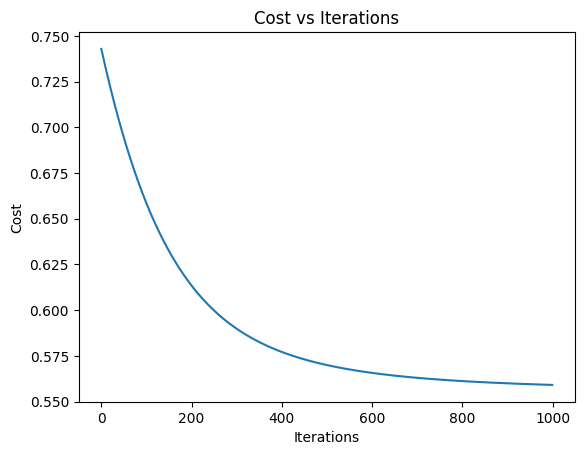

Accuracy: 97.25%


In [10]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the forward propagation function for the neural network
# Update the sigmoid function to tanh in the forward propagation function for the hidden layer.
def forward_propagation(X, W1, b1, W2, b2):
    # Layer 1
    Z1 = np.dot(X, W1) + b1
    a1 = np.tanh(Z1)  

    # Layer 2
    Z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(Z2)

    return a1, a2  # Return a1 as well for backward propagation.


# Update the backward propagation function to use tanh derivative for the hidden layer.
def backward_propagation(X, y, a1, a2, W2):
    # Compute gradients for Layer 2 (output layer)
    dZ2 = a2 - y
    dW2 = np.dot(a1.T, dZ2) / len(X)
    db2 = np.mean(dZ2, axis=0)

    # Compute gradients for Layer 1 (hidden layer) using tanh derivative
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(a1, 2))  # Tanh derivative
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.mean(dZ1, axis=0)

    return dW1, db1, dW2, db2


# Define the neural network training function using gradient descent.
def train_neural_network(X, y, W1, b1, W2, b2, num_iterations, learning_rate):
    costs = []  # To store costs at each iteration

    for i in range(num_iterations):
        # Forward propagation.
        a1, a2 = forward_propagation(X, W1, b1, W2, b2)

        # Compute cost.
        cost = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
        costs.append(cost)

        # Backpropagation.
        dW1, db1, dW2, db2 = backward_propagation(X, y, a1, a2, W2)

        # Update weights and biases.
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Print cost every 100 iterations.
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W1, b1, W2, b2, costs

# Set hyperparameters for training the neural network.
num_iterations = 1000
learning_rate = 0.01

# Define initial weights and biases for the neural network.
input_size = X_train.shape[1]
hidden_size = 4  # You can adjust this as needed.
output_size = 1
np.random.seed(0) # Without setting the seed, each run would produce different random numbers, which could make it challenging to compare results
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, W1, b1, W2, b2, num_iterations, learning_rate)

# Plot cost vs iterations curve.
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Define the predict function using the learned parameters
def predict(X, W1, b1, W2, b2):
    a1, a2 = forward_propagation(X, W1, b1, W2, b2)
    return (a2 > 0.5).astype(int)

# Predict using the trained model on test data
y_pred = predict(X_test, W1, b1, W2, b2)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")


In [11]:
# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, W1, b1, W2, b2, num_iterations, learning_rate)

# Print the learned parameters
print("Learned Parameters:")
print("W1 (weights for layer 1):\n", W1)
print("b1 (bias for layer 1):\n", b1)
print("W2 (weights for layer 2):\n", W2)
print("b2 (bias for layer 2):\n", b2)


Iteration 0: Cost = 0.55909024892082
Iteration 100: Cost = 0.5584465356177291
Iteration 200: Cost = 0.5579572769241414
Iteration 300: Cost = 0.5575740787245951
Iteration 400: Cost = 0.5572649032948778
Iteration 500: Cost = 0.5570080415319851
Iteration 600: Cost = 0.5567885150910257
Iteration 700: Cost = 0.5565958453581913
Iteration 800: Cost = 0.556422623581914
Iteration 900: Cost = 0.5562635688575719
Learned Parameters:
W1 (weights for layer 1):
 [[ 1.75370585  0.39016783  0.9827139   2.24214031]
 [ 1.84603231 -0.98472911  0.94522203 -0.17299543]
 [-0.14738584  0.3642269   0.08887877  1.44685752]]
b1 (bias for layer 1):
 [[-0.32437051 -0.07243495 -0.20300432 -0.02640398]]
W2 (weights for layer 2):
 [[ 0.57958436]
 [ 0.11210328]
 [ 0.22377504]
 [-0.00413164]]
b2 (bias for layer 2):
 [[-0.98301553]]


In [12]:
# Train the neural network and obtain the learned parameters
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, W1, b1, W2, b2, num_iterations, learning_rate)

# Perform forward propagation to get a1 and a2
a1, a2 = forward_propagation(X_train, W1, b1, W2, b2)

# Calculate gradients using backward propagation
dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, a1, a2, W2)

# Print the gradients
print("Gradients:")
print("dW1 (gradient of weights for layer 1):\n", dW1)
print("db1 (gradient of bias for layer 1):\n", db1)
print("dW2 (gradient of weights for layer 2):\n", dW2)
print("db2 (gradient of bias for layer 2):\n", db2)


Iteration 0: Cost = 0.5561148934503999
Iteration 100: Cost = 0.5559738674710977
Iteration 200: Cost = 0.5558385160480149
Iteration 300: Cost = 0.5557074063283441
Iteration 400: Cost = 0.5555794963610273
Iteration 500: Cost = 0.5554540271542638
Iteration 600: Cost = 0.5553304451607459
Iteration 700: Cost = 0.555208346378818
Iteration 800: Cost = 0.5550874359069217
Iteration 900: Cost = 0.5549674986010799
Gradients:
dW1 (gradient of weights for layer 1):
 [[-4.04460713e-04 -1.10177961e-03 -8.90861034e-04  6.92537404e-05]
 [ 1.58526332e-03 -1.51634203e-04  9.12796940e-05 -2.60226692e-04]
 [-9.85450506e-04  1.79382424e-03  9.83245683e-04 -9.34021343e-05]]
db1 (gradient of bias for layer 1):
 [ 0.00901431 -0.00036075  0.0036757   0.00018087]
dW2 (gradient of weights for layer 2):
 [[-0.00268185]
 [-0.00180527]
 [ 0.00023326]
 [ 0.00165443]]
db2 (gradient of bias for layer 2):
 [-0.00079061]


In [13]:
# Define the neural network training function using gradient descent
def train_neural_network(X, y, W1, b1, W2, b2, num_iterations, learning_rate):
    costs = []  # To store costs at each iteration

    for i in range(num_iterations):
        # Forward propagation
        a1, a2 = forward_propagation(X, W1, b1, W2, b2)

        # Compute cost
        cost = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
        costs.append(cost)

        # Backpropagation
        dW1, db1, dW2, db2 = backward_propagation(X, y, a1, a2, W2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W1, b1, W2, b2, costs

Iteration 0: Cost = 0.7429183525672692
Iteration 100: Cost = 0.6584470975646064
Iteration 200: Cost = 0.6134203498828132
Iteration 300: Cost = 0.5898227624884812
Iteration 400: Cost = 0.5771238126697612
Iteration 500: Cost = 0.5699490407040161
Iteration 600: Cost = 0.5656654206195487
Iteration 700: Cost = 0.562968575468215
Iteration 800: Cost = 0.5611883353547934
Iteration 900: Cost = 0.5599637029034539


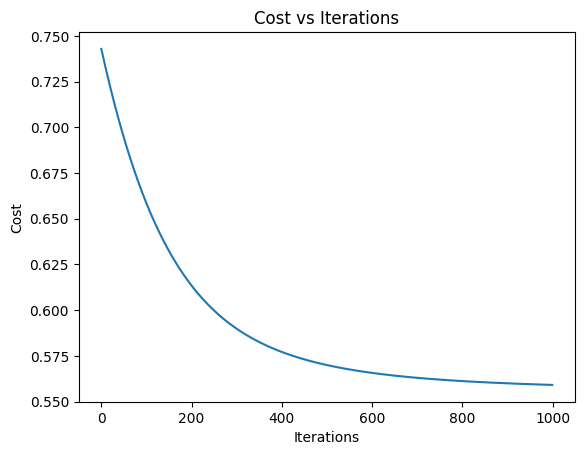

Accuracy: 97.25%


In [14]:
# Set hyperparameters for training the neural network
num_iterations = 1000
learning_rate = 0.01

# Define initial weights and biases for the neural network
input_size = X_train.shape[1]
hidden_size = 4  # You can adjust this as needed
output_size = 1
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, W1, b1, W2, b2, num_iterations, learning_rate)

# Plot cost vs iterations curve
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Define the predict function using the learned parameters
def predict(X, W1, b1, W2, b2):
    a1, a2 = forward_propagation(X, W1, b1, W2, b2)
    return (a2 > 0.5).astype(int)

# Predict using the trained model on test data
y_pred = predict(X_test, W1, b1, W2, b2)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")
